 # Implementing Decision Tree classifier.

In [1]:
# Import the Neccesary packages.
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('brain.csv')

In [4]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Ischemic stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Ischemic stroke
2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Ischemic stroke
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,Ischemic stroke
4,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,Ischemic stroke


In [5]:
df = data.dropna()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['gender','smoking_status']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'target'],
      dtype='object')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,Ischemic stroke
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,2,Ischemic stroke
2,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,2,Ischemic stroke
3,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,Ischemic stroke
4,1,74.0,1,1,Yes,Private,Rural,70.09,27.4,2,Ischemic stroke


In [9]:
del df['ever_married']
del df['work_type']
del df['Residence_type']

In [10]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,target
0,1,67.0,0,1,228.69,36.6,1,Ischemic stroke
1,1,80.0,0,1,105.92,32.5,2,Ischemic stroke
2,0,79.0,1,0,174.12,24.0,2,Ischemic stroke
3,1,81.0,0,0,186.21,29.0,1,Ischemic stroke
4,1,74.0,1,1,70.09,27.4,2,Ischemic stroke


In [11]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='target', axis=1)
#Response variable
y = df.loc[:,'target']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  1442
Number of test dataset     :  618
Total number of dataset    :  2060


#### Implementing the DecisionTree classifier

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [14]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)
predictDt =Dt.predict(x_test)

Finding the accuracy of Decision Tree classifier.

In [15]:
accuracy = accuracy_score(y_test, predictDt)
print("Accuracy of DecisionTree classifier:", accuracy *100)

Accuracy of DecisionTree classifier: 100.0


Finding the classification Report Decision tree classifier.

In [16]:
cr = classification_report(y_test, predictDt)
print("Classification report \n\n:", cr)

Classification report 

:                     precision    recall  f1-score   support

   Ischemic stroke       1.00      1.00      1.00       266
hemorrhagic stroke       1.00      1.00      1.00       352

          accuracy                           1.00       618
         macro avg       1.00      1.00      1.00       618
      weighted avg       1.00      1.00      1.00       618



Finding the Confusion matrix Decision tree classifier.

In [17]:
cm = confusion_matrix(y_test, predictDt)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[266   0]
 [  0 352]]


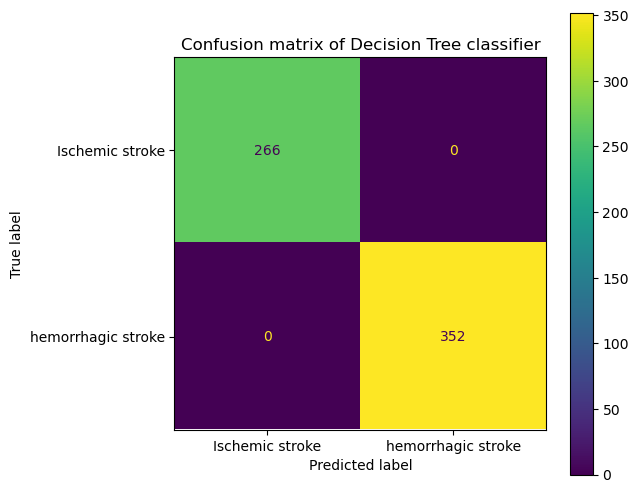

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(Dt, x_test, y_test, ax=ax)
plt.title('Confusion matrix of Decision Tree classifier')
plt.show()

In [19]:
import joblib
joblib.dump(Dt,'Dt1.pkl')

['Dt1.pkl']